# ODE in Mechanics

## The simple pendulum ODE:

Let us consider a pendulum of length $l$ with a mass, $m$, at its end. The angle the pendulum makes with the vertical axis over time, $\theta(t)$, in the presence of vertical gravity, $g$, can be described by the pendulum equation, which is the following ODE:

$$
ml\frac{d^2\theta(t)}{dt^2} = -mg \sin(\theta(t)).
$$

This equation can be derived by summing the forces in the $x$ and $y$ direction, and then changing to polar coordinates.

**Reference:** https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html

### Solution:

If we assume the angles are very small (i.e., $\sin(\theta(t)) \approx \theta(t)$), then the pendulum equation reduces to

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t).
$$

The solution to the pendulum equation reads:

$$
\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)
$$

If the angle and angular velocities at $t = 0$ are the known values, $\theta_0$ and 0, respectively, verify that $\theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right)$ is a particular solution for these known values.

### Verification:

For the general solution, the derivatives of $\theta(t)$ are:

$$
\frac{d\theta(t)}{dt} = -\sqrt{\frac{g}{l}}\sin\left(\sqrt{\frac{g}{l}}t\right)
$$

and

$$
\frac{d^2\theta(t)}{dt^2} = -\frac{g}{l}\cos\left(\sqrt{\frac{g}{l}}t\right).
$$

By plugging the second derivative back into the differential equation on the left side, it is easy to verify that $\theta(t)$ satisfies the equation and so is a general solution.

For the particular solution, the $\theta_0$ coefficient will carry through the derivatives, and it can be verified that the equation is satisfied. $\theta(0) = \theta_0 \cos(0) = \theta_0$, and $0 = -\theta_0 \sqrt{\frac{g}{l}}\sin(0) = 0$, therefore the particular solution also satisfies the known values.

## The need of numerical methods:

The small-angle approximation is used because there is no explicit solution for the pendulum equation with large angles that is as simple algebraically. The pendulum ODE is much simpler than most practical ODE applications and has no obvious analytic solution, so the need for numerical solutions to ODEs is clear.

Intuitively, the pendulum equation can be solved as an initial value problem because under only the force of gravity, an initial position and velocity should be sufficient to describe the motion of the pendulum for all time afterward.

## Reduction of order:

Many numerical methods for solving initial value problems are designed specifically to solve first-order differential equations.


To make these solvers useful for solving higher order differential equations, we must often **reduce the order** of the differential equation to first order.


To reduce the order of a differential equation, consider a vector, $S(t)$, which is the **state** of the system as a function of time. In general, the state of a system is a collection of all the dependent variables that are relevant to the behavior of the system. The ODEs can be expressed as

$$
f^{(n)}(t) = F\left(t, f(t), f^{(1)}(t), f^{(2)}(t), f^{(3)}(t),\ldots, f^{(n-1)}(t)\right),
$$

for initial value problems, it is useful to take the state to be

$$
S(t) =\left[\begin{array}{c}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\cdots \\
f^{(n-1)}(t)
\end{array}\right].
$$

Then the derivative of the state is

$$
\frac{dS(t)}{dt} =\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
f^{(n)}(t)
\end{array}\right]\!=\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
F\left(t, f(t), f^{(1)}(t),\ldots, f^{(n-1)}(t)\right)
\end{array}\right]\!=\!\left[\begin{array}{c}
S_2(t) \\
S_3(t) \\
S_4(t) \\
S_5(t) \\
\cdots \\
F\left(t, S_1(t), S_2(t),\ldots, S_{n-1}(t)\right)
\end{array}\right]\!,
$$

where $S_i(t)$ is the $i^{\mathrm{th}}$ element of $S(t)$. With the state written in this way, $\frac{dS(t)}{dt}$ can be written using only $S(t)$ (i.e., no $f(t)$) or its derivatives.

In particular, $\frac{dS(t)}{dt} = {\mathcal{F}}(t,S(t))$, where ${\mathcal{F}}$ is a function that appropriately assembles the vector describing the derivative of the state.

This equation is in the form of a first-order differential equation in $S$. Essentially, what we have done is turn an $n^{\mathrm{th}}$ order ODE into $n$ first order ODEs that are **coupled** together, meaning they share the same terms.

 ## Example:

Reduce the second order pendulum equation to first order, where

$$
S(t) =\left[\begin{array}{c}
\theta(t) \\
\dot{\theta}(t)
\end{array}\right].
$$

Taking the derivative of $S(t)$ and substituting gives the correct expression.

$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
S_2(t) \\
-\frac{g}{l}S_1(t)
\end{array}\right]
$$

It happens that this ODE can be written in matrix form:

$$
\frac{dS(t)}{dt} =\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t)
$$

ODEs that can be written in this way are said to be **linear ODEs**.

Although reducing the order of an ODE to first order results in an ODE with multiple variables, all the derivatives are still taken with respect to the same independent variable, $t$. Therefore, the ordinariness of the differential equation is retained.

It is worth noting that the state can hold multiple dependent variables and their derivatives as long as the derivatives are with respect to the same independent variable.

## Explicit and implicit schemes:

Consider the pendulum equation, which has been reduced to first order.

$$
\frac{dS(t)}{dt} =\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t)
$$

For this equation,

$$
F(t_j, S(t_j)) =\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t_j).
$$

If we plug this expression into the **Explicit Euler Formula**, we get the following equation:

$$
S(t_{j+1}) = S(t_j) + h \left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t_j) = \left[\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right]S(t_j) + h\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t_j)= \left[\begin{array}{cc}
1 & h \\
-\frac{gh}{l} & 1
\end{array}\right]S(t_j)
$$

Similarly, we can plug the same expression into the **Implicit Euler** to get

$$
\left[\begin{array}{cc}
1 & -h \\
\frac{gh}{l} & 1
\end{array}\right]S(t_{j+1}) = S(t_j),
$$

and into the **Trapezoidal Formula** to get

$$
\left[\begin{array}{cc}
1 & -\frac{h}{2} \\
\frac{gh}{2l} & 1
\end{array}\right]S(t_{j+1}) = \left[\begin{array}{cc}
1 & \frac{h}{2} \\
-\frac{gh}{2l} & 1
\end{array}\right]S(t_j).
$$

With some rearrangement, these equations become, respectively,

$$
\begin{eqnarray*}
&& S(t_{j+1}) = \left[\begin{array}{cc}
1 & -h \\
\frac{gh}{l} & 1
\end{array}\right]^{-1} S(t_j),\\
&& S(t_{j+1}) = \left[\begin{array}{cc}
1 & -\frac{h}{2} \\
\frac{gh}{2l} & 1
\end{array}\right]^{-1}\left[\begin{array}{cc}
1 & \frac{h}{2} \\
-\frac{gh}{2l} & 1
\end{array}\right]S(t_j).
\end{eqnarray*}
$$


These equations allow us to solve the initial value problem, since at each state, $S(t_j)$, we can compute the next state at $S(t_{j+1})$. In general, this is possible to do when an ODE is linear.


## Exercise:

Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval $[0,5]$ in increments of $0.1$ and for an initial solution of $S_0 = \left[\begin{array}{c} 1\\0 \end{array}\right]$. Use a frequency of $\sqrt{\frac{g}{l}} = 4$. Plot the approximate solution on a single graph.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [3]:
# define step size
h = 0.1

# define numerical grid
t = np.arange(0, 5.1, h)

# oscillation freq. of pendulum
w = 4 # sqrt(g/l)

s0 = np.array([[1], [0]])

print(s0.shape)

(2, 1)


## Explicit Euler:

$$
S(t_{j+1}) = \left[\begin{array}{cc}
1 & h \\
-\frac{gh}{l} & 1
\end{array}\right]S(t_j)
$$

In [5]:
m_e = np.array([[1, h], [-w**2*h, 1]])

print(m_e.shape)

(2, 2)


## Implicit Euler:

$$
\begin{eqnarray*}
&& S(t_{j+1}) = \left[\begin{array}{cc}
1 & -h \\
\frac{gh}{l} & 1
\end{array}\right]^{-1} S(t_j),
\end{eqnarray*}
$$

In [6]:
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))

## Trapezoid:


$$
\begin{eqnarray*}
S(t_{j+1}) = \left[\begin{array}{cc}
1 & -\frac{h}{2} \\
\frac{gh}{2l} & 1
\end{array}\right]^{-1}\left[\begin{array}{cc}
1 & \frac{h}{2} \\
-\frac{gh}{2l} & 1
\end{array}\right]S(t_j).
\end{eqnarray*}
$$

In [7]:
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

## Integrating:

In [8]:
# Empty vectors to fill in with solutions
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# Add initial conditions
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

# Do integrations
for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e, s_e[j, :])
    s_i[j+1, :] = np.dot(m_i, s_i[j, :])
    s_t[j+1, :] = np.dot(m_t, s_t[j, :])


## Plotting:

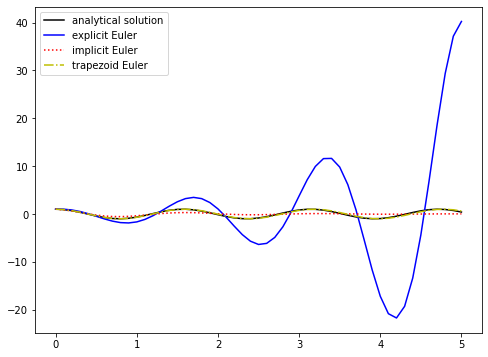

In [7]:
plt.figure(figsize = (8, 6))

plt.plot(t, np.cos(w*t), 'k', label='analytical solution')
plt.plot(t, s_e[:,0],'b-', label='explicit Euler')
plt.plot(t, s_i[:,0],'r:', label='implicit Euler')
plt.plot(t, s_t[:,0],'y-.', label='trapezoid Euler')

plt.legend()

plt.show()

### Repeat for h=0.01

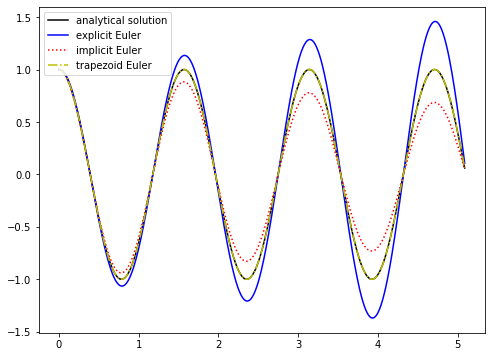

In [9]:
# define step size
h = 0.01

# define numerical grid
t = np.arange(0, 5.1, h)

# oscillation freq. of pendulum
w = 4 # sqrt(g/l)

# initial conditions
s0 = np.array([[1], [0]])

# Matrices:
# Explicit:
m_e = np.array([[1, h], [-w**2*h, 1]])

# Implicit:
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))

# Trapezoid:
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

# Empty vectors to fill in with solutions
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# Add initial conditions
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

# Do integrations
for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e, s_e[j, :])
    s_i[j+1, :] = np.dot(m_i, s_i[j, :])
    s_t[j+1, :] = np.dot(m_t, s_t[j, :])

# Plotting
plt.figure(figsize = (8, 6))

plt.plot(t, np.cos(w*t), 'k', label='analytical solution')
plt.plot(t, s_e[:,0],'b-', label='explicit Euler')
plt.plot(t, s_i[:,0],'r:', label='implicit Euler')
plt.plot(t, s_t[:,0],'y-.', label='trapezoid Euler')

plt.legend()

plt.show()

### For h=0.001

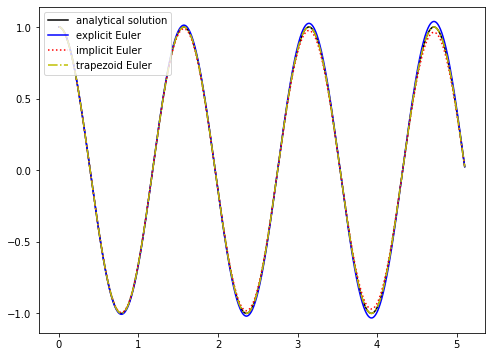

In [10]:
# define step size
h = 0.001

# define numerical grid
t = np.arange(0, 5.1, h)

# oscillation freq. of pendulum
w = 4 # sqrt(g/l)

# initial conditions
s0 = np.array([[1], [0]])

# Matrices:
# Explicit:
m_e = np.array([[1, h], [-w**2*h, 1]])

# Implicit:
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))

# Trapezoid:
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

# Empty vectors to fill in with solutions
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# Add initial conditions
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

# Do integrations
for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e, s_e[j, :])
    s_i[j+1, :] = np.dot(m_i, s_i[j, :])
    s_t[j+1, :] = np.dot(m_t, s_t[j, :])

# Plotting
plt.figure(figsize = (8, 6))

plt.plot(t, np.cos(w*t), 'k', label='analytical solution')
plt.plot(t, s_e[:,0],'b-', label='explicit Euler')
plt.plot(t, s_i[:,0],'r:', label='implicit Euler')
plt.plot(t, s_t[:,0],'y-.', label='trapezoid Euler')

plt.legend(loc=2)

plt.show()

## Numerical Error and Instability

There are two main issues to consider with regard to integration schemes for ODEs: **accuracy** and **stability**.

- **Accuracy** refers to a scheme's ability to get close to the exact solution, which is usually unknown, as a function of the step size $h$, i.e., $O(h^p)$. 


- The **stability** of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable.


- Some integration schemes are stable for certain choices of $h$ and unstable for others; these integration schemes are also referred to as unstable.